# Analyse Trump Twitter

# Get Raw Data

In [1]:
import pickle 

# Read Trump Twitter Archive
f1 = open('all_tweets.pickle', 'rb') 
all_tweets = pickle.load(f1)
all_tweets

,source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet
0,Twitter Web Client,1698308935,Be sure to tune in and watch Donald Trump on L...,2009-05-04 18:54:25,253,NA,202,False
1,Twitter Web Client,1701461182,Donald Trump will be appearing on The View tom...,2009-05-05 01:00:10,2,NA,3,False
2,Twitter Web Client,1737479987,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 13:38:08,3,NA,2,False
3,Twitter Web Client,1741160716,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 20:40:15,8,NA,27,False
4,Twitter Web Client,1773561338,"""My persona will never be that of a wallflower...",2009-05-12 14:07:28,1421,NA,1950,False
...,...,...,...,...,...,...,...,...
48915,Twitter for iPhone,1267432507005448192,“These were the people that trashed Seattle ye...,2020-06-01 12:27:12,27496,NA,93429,False
48916,Twitter for iPhone,1267436848957272064,Sleep Joe Biden’s people are so Radical Left t...,2020-06-01 12:44:27,10295,NA,39032,False
48917,Twitter for iPhone,1267437132240441344,NOVEMBER 3RD.,2020-06-01 12:45:34,35658,NA,196742,False
48918,Twitter for iPhone,1267445910826627078,Sleepy Joe Biden’s people are so Radical Left ...,2020-06-01 13:20:27,26083,NA,105754,False


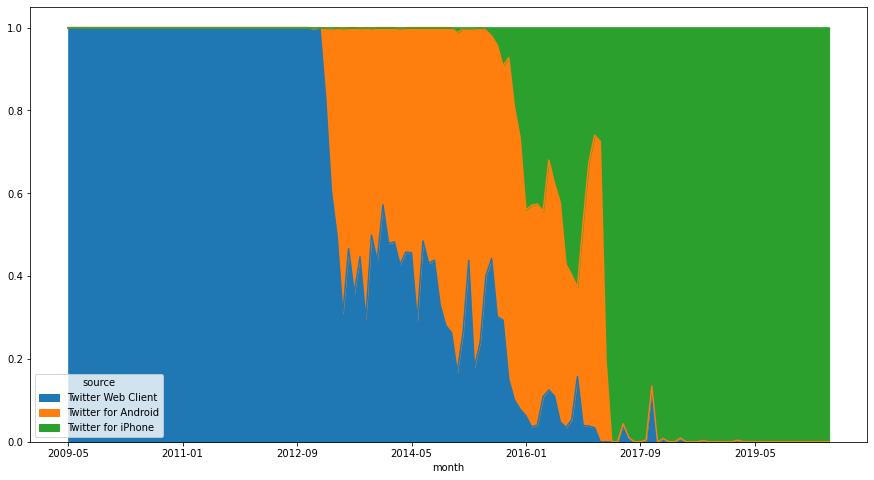

In [2]:
def getmonth(x):
    return x.strftime('%Y-%m')

all_tweets2=all_tweets[(all_tweets['is_retweet']==False) & 
                       (all_tweets['source'].isin(['Twitter Web Client','Twitter for Android','Twitter for iPhone']))].copy()
all_tweets2['month']=all_tweets2['created_at'].apply(getmonth)

x=all_tweets2.groupby(['month','source'])['text'].count().unstack().fillna(0)
data_perc = x.divide(x.sum(axis=1), axis=0)
data_perc.plot.area(figsize=(15,8));

In [3]:
# Read S&P 500 High-Frequency Return
f1 = open('spxt.pickle', 'rb') 
spxt = pickle.load(f1)
spxt

,date,price,price_close,toclose
0,2016-01-04 09:30:00,2017.85,2012.98,-0.002413
1,2016-01-04 09:31:00,2012.45,2012.98,0.000263
2,2016-01-04 09:32:00,2010.96,2012.98,0.001004
3,2016-01-04 09:33:00,2007.41,2012.98,0.002775
4,2016-01-04 09:34:00,2005.06,2012.98,0.003950
...,...,...,...,...
286240,2018-12-04 15:55:00,2699.81,2700.75,0.000348
286241,2018-12-04 15:56:00,2697.35,2700.75,0.001260
286242,2018-12-04 15:57:00,2697.59,2700.75,0.001171
286243,2018-12-04 15:58:00,2701.14,2700.75,-0.000144


# Preprocessing Data

In [4]:
# Only original tweets after 2018 

all_tweets=all_tweets[all_tweets['is_retweet']!=True]
all_tweets=all_tweets[all_tweets['created_at']>='2016-12-31']
trumpt=all_tweets[['created_at','text']].dropna()
trumpt

,created_at,text
30189,2016-12-31 13:17:21,"Happy New Year to all, including to my many en..."
30190,2016-12-31 18:58:12,Happy Birthday @DonaldJTrumpJr!\nhttps://t.co/...
30192,2017-01-01 05:00:10,TO ALL AMERICANS-\n#HappyNewYear &amp; many bl...
30198,2017-01-02 14:40:10,"Well, the New Year begins. We will, together, ..."
30199,2017-01-02 17:31:17,"Chicago murder rate is record setting - 4,331 ..."
...,...,...
48915,2020-06-01 12:27:12,“These were the people that trashed Seattle ye...
48916,2020-06-01 12:44:27,Sleep Joe Biden’s people are so Radical Left t...
48917,2020-06-01 12:45:34,NOVEMBER 3RD.
48918,2020-06-01 13:20:27,Sleepy Joe Biden’s people are so Radical Left ...


In [5]:
# Cleaning data

import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stopwords_list = stopwords.words('english')
punctuation_remover = str.maketrans('','', string.punctuation)

for i in trumpt.index:
    
    text=trumpt.at[i,'text']
    text=re.sub('RT|via|amp|realDonaldTrump',' ', text)

    #All lower case
    text=text.lower()

    #Remove brackets 
    text=re.sub(r'[\(\[].*?[\)\]]', r' ', text)
    
    #Removal of HTTP links/URLs
    text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

    #Remove stop words
    text_tokens = word_tokenize(text)
    text = ' '.join([word for word in text_tokens if not word in stopwords_list])

    #Remove non-alphanumeric characters
    text=re.sub(r'\d+', r'', text)
    text=re.sub(r'\W+', r' ', text)        
    
    #Remove punctuation
    text=text.translate(punctuation_remover)
    text=re.sub(r'“|”|’|\.|,|&',' ', text)

    #Replace multi-space
    text=re.sub(r'\s+', r' ', text)
    
    #Remobe no non-ASCII characters
    text=re.sub(r'[^\x00-\x7f]',r'', text) 
    
    trumpt.at[i,'text']=text

trumpt['text']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


30189    happy new year including many enemies fought l...
30190                       happy birthday donaldjtrumpjr 
30192    americans happynewyear many blessings looking ...
30198    well new year begins together make america great 
30199    chicago murder rate record setting shooting vi...
                               ...                        
48915     people trashed seattle years ago paying peopl...
48916    sleep joe biden people radical left working ge...
48917                                         november rd 
48918    sleepy joe biden people radical left working g...
48919     trump leading swing states heavily biased dem...
Name: text, Length: 16766, dtype: object

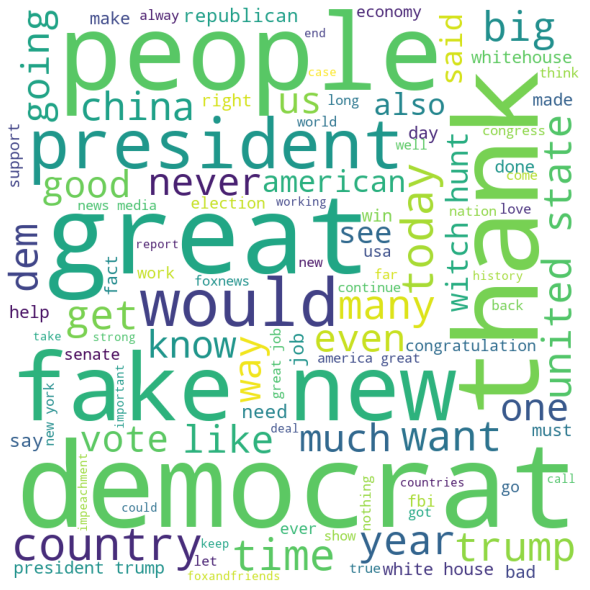

In [6]:
# Plot Word Cloud 
#pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd 
  
wordcloud = WordCloud(width = 800, height = 800, 
                max_words=100, 
                background_color ='white', 
                stopwords = stopwords_list, 
                min_font_size = 10).generate(' '.join(trumpt['text'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [7]:
# Connect Tweets with Market Data
def ispositive(x):
    if (x>=0):
        return "Up"
    else:
        return "Down"
    
#DF.apply to apply function to entire colmun here
#create a new col here, and populate with texts
spxt['Market']=spxt['toclose'].apply(ispositive)

#[col attributes>value]:a condition to filter/select rows
mindatetime=spxt['date'].iloc[0]
trumpt=trumpt[trumpt['created_at']>=mindatetime]

maxdatetime=spxt['date'].iloc[-1]
trumpt=trumpt[trumpt['created_at']<=maxdatetime]

#to create and populate the 2 new columns
#dataframe.at means access a single cell of (row,col)
#spxt[>=][].iloc[0]: to get the 1st toclose data for a tweet time, using iloc[0] to get the earliest one
for i in trumpt.index:
    trumpt.at[i,'toclose']=spxt[spxt['date']>=trumpt.at[i,'created_at']]['toclose'].iloc[0]
    trumpt.at[i,'Market']=spxt[spxt['date']>=trumpt.at[i,'created_at']]['Market'].iloc[0]

#trumpt is the last processed dataframe version
trumpt=trumpt.dropna()
trumpt

# model: Market = Text

,created_at,text,toclose,Market
30189,2016-12-31 13:17:21,happy new year including many enemies fought l...,0.000705,Up
30190,2016-12-31 18:58:12,happy birthday donaldjtrumpjr,0.000705,Up
30192,2017-01-01 05:00:10,americans happynewyear many blessings looking ...,0.000705,Up
30198,2017-01-02 14:40:10,well new year begins together make america great,0.000705,Up
30199,2017-01-02 17:31:17,chicago murder rate record setting shooting vi...,0.000705,Up
...,...,...,...,...
36037,2018-12-04 14:22:01,looking forward wonderful bush family blair ho...,-0.008080,Down
36038,2018-12-04 14:30:16,negotiations china already started unless exte...,-0.007632,Down
36039,2018-12-04 14:55:35,seeing whether real deal china actually possi...,-0.009463,Down
36040,2018-12-04 15:03:41,tariff man people countries come raid great w...,-0.005864,Down


# Generate Training & Testing Sets

In [8]:
# Split Data into Training/Testing Sets

# Load modules
from sklearn.model_selection import train_test_split

# Split Data into Training/Testing Sets

test_dataset, training_dataset = train_test_split(trumpt, test_size=0.75, random_state=0)

In [9]:
# Training: Naive Bayes

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(training_dataset['text'],training_dataset['Market'])

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

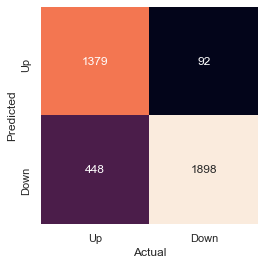

In [11]:
# Evaluate the fit
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(training_dataset['Market'], model.predict(training_dataset['text']))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Up','Down'], yticklabels=['Up','Down'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Model Validation

Predict
Down   -0.000760
Up      0.000035
Name: toclose, dtype: float64

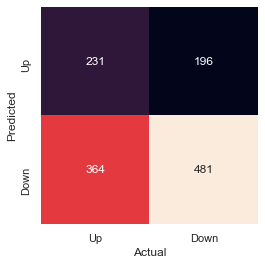

In [12]:
# Evaluate the predictions

mat = confusion_matrix(test_dataset['Market'], model.predict(test_dataset['text']))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Up','Down'], yticklabels=['Up','Down'])
plt.xlabel('Actual')
plt.ylabel('Predicted');

test_dataset.insert(3,'Predict',model.predict(test_dataset['text']),True)
test_dataset.groupby('Predict')['toclose'].mean()

# Build a Trading Strategy around Trump’s Tweets

                    Predict  LongOnly
created_at                           
2016-12-31 13:17:21      Up  0.000705
2017-01-02 18:44:04      Up  0.000705
2017-01-03 17:00:11      Up  0.002636
2017-01-04 12:22:38      Up  0.000449
2017-01-04 13:27:03      Up  0.000710
...                     ...       ...
2018-12-03 12:54:30      Up  0.003138
2018-12-03 13:18:01      Up  0.001001
2018-12-03 13:30:46      Up  0.001453
2018-12-03 15:56:06      Up  0.000760
2018-12-04 14:55:35    Down -0.009463

[1272 rows x 2 columns]
               created_at                                               text  \
30189 2016-12-31 13:17:21  happy new year including many enemies fought l...   
30190 2016-12-31 18:58:12                     happy birthday donaldjtrumpjr    
30192 2017-01-01 05:00:10  americans happynewyear many blessings looking ...   
30198 2017-01-02 14:40:10  well new year begins together make america great    
30199 2017-01-02 17:31:17  chicago murder rate record setting shooting vi...   
.

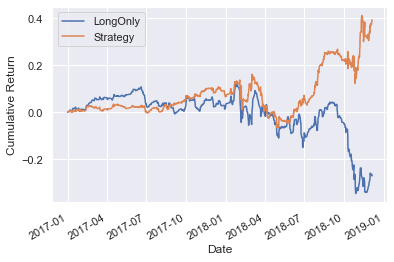

In [13]:
# Strategy: For each new trump tweet
# 		if model Predict==“BULL” long %100 S&P 500 until market close
# 		else short %100 S&P 500 until market close

#create a dataframe from a list created now
#model.predict return y given x
#longOnly get the gain from the toclose
test_dataset2=pd.DataFrame({'Predict':model.predict(test_dataset['text']),
                            'LongOnly':test_dataset['toclose']})

#a=b=c->a=c and b=c
#sort according to its index
test_dataset2.index=index=test_dataset['created_at']
test_dataset2.sort_index(inplace=True)

#----------------------------------------------------------
#save the dataframe processed before into a pickle file
import pickle
import pandas as pd

# Writing Pickle to a file
f = open("pickle_test", "wb") # remember to open the file in binary mode


pickle.dump(test_dataset2, f)

pickle.dump(trumpt, f) 
 
f.close()

# Reading Pickle from a file
f = open("pickle_test", "rb")
 
print(pickle.load(f))
print(pickle.load(f))
f.close()
#------------------------------------------------------------

#need modification for HW3A
#can copy paste the past cells, or make it into a pickle file
#1B or 2B[21] showing dump code, to dump test_dataset2 to pickle 

#create a new column 'strategy'
for i in test_dataset2.index:
    if (test_dataset2.at[i,'Predict']=='Up'):
        test_dataset2.at[i,'Strategy']=test_dataset2.at[i,'LongOnly']
    else:
        test_dataset2.at[i,'Strategy']=-test_dataset2.at[i,'LongOnly']

#plot two columns' product of series, which collects each cumproduct in each row
((1 + test_dataset2[['LongOnly','Strategy']]).cumprod() - 1).plot()
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()

# Convert text to numerical values

In [14]:
# Create document term matrix
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
  
# Initialize => only keep words used more than 50 times 
vectorizer = TfidfVectorizer(min_df=50)
doc_vec = vectorizer.fit_transform(trumpt['text'])
 
# Create dataFrame
df = pd.DataFrame(doc_vec.toarray(),
                   columns =vectorizer.get_feature_names())

# Set Index
df.index=trumpt.index

# Remove Tweets without familiar words
df=df[(df.T != 0).any()]

#Convert numerical feasures to categorical features
def convert_counts(x):
    if (x>0):
        return True
    else:
        return False

df=df.applymap(convert_counts)

# Attached timestamp & market performance
df[['toclose','Market','created_at']]=trumpt[['toclose','Market','created_at']]

df

,administration,aign,already,also,always,amendment,america,american,americans,angry,...,would,wow,wrong,year,years,yesterday,york,toclose,Market,created_at
30189,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0.000705,Up,2016-12-31 13:17:21
30190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0.000705,Up,2016-12-31 18:58:12
30192,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,0.000705,Up,2017-01-01 05:00:10
30198,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,0.000705,Up,2017-01-02 14:40:10
30199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0.000705,Up,2017-01-02 17:31:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.008080,Down,2018-12-04 14:22:01
36038,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.007632,Down,2018-12-04 14:30:16
36039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,-0.009463,Down,2018-12-04 14:55:35
36040,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,-0.005864,Down,2018-12-04 15:03:41


# Generate Training & Testing Sets

In [15]:
# Split Data into Training/Testing Sets

# Load modules
from sklearn.model_selection import train_test_split

# Split Data into Training/Testing Sets

test_dataset, training_dataset = train_test_split(df, test_size=0.75, random_state=1)

# Training: Support Vector Machines

In [16]:
# Fitting a support vector machine

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear',  probability=True)

model.fit(training_dataset.loc[:,'aign':'years'],training_dataset.loc[:,'Market'])

SVC(kernel='linear', probability=True)

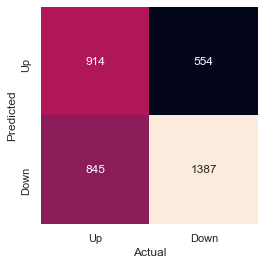

In [17]:
# Evaluate the fit
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(training_dataset['Market'], model.predict(training_dataset.loc[:,'aign':'years']))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Up','Down'], yticklabels=['Up','Down'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Model Validation

Predict
Down   -0.000594
Up     -0.000004
Name: toclose, dtype: float64

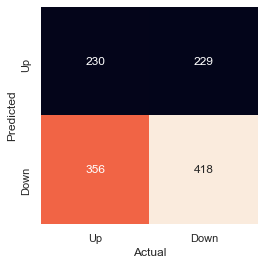

In [18]:
# Evaluate the predictions

mat = confusion_matrix(test_dataset['Market'], model.predict(test_dataset.loc[:,'aign':'years']))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Up','Down'], yticklabels=['Up','Down'])
plt.xlabel('Actual')
plt.ylabel('Predicted');

test_dataset.insert(3,'Predict',model.predict(test_dataset.loc[:,'aign':'years']),True)
test_dataset.groupby('Predict')['toclose'].mean()



<h1>New Trading Strategy w/o Leverage & Performance Comparison</h1>

In [1]:
#import previous processed data 

import pickle
import matplotlib.pyplot as plt 

# Reading Pickle from a file
f = open("pickle_test", "rb")


test_dataset2=pickle.load(f)
trumpt=pickle.load(f)

print('test_dataset2',test_dataset2)
print('trumpt',trumpt)
f.close()

test_dataset2                     Predict  LongOnly
created_at                           
2016-12-31 13:17:21      Up  0.000705
2017-01-02 18:44:04      Up  0.000705
2017-01-03 17:00:11      Up  0.002636
2017-01-04 12:22:38      Up  0.000449
2017-01-04 13:27:03      Up  0.000710
...                     ...       ...
2018-12-03 12:54:30      Up  0.003138
2018-12-03 13:18:01      Up  0.001001
2018-12-03 13:30:46      Up  0.001453
2018-12-03 15:56:06      Up  0.000760
2018-12-04 14:55:35    Down -0.009463

[1272 rows x 2 columns]
trumpt                created_at                                               text  \
30189 2016-12-31 13:17:21  happy new year including many enemies fought l...   
30190 2016-12-31 18:58:12                     happy birthday donaldjtrumpjr    
30192 2017-01-01 05:00:10  americans happynewyear many blessings looking ...   
30198 2017-01-02 14:40:10  well new year begins together make america great    
30199 2017-01-02 17:31:17  chicago murder rate record settin

                    Predict  LongOnly  Strategy
created_at                                     
2016-12-31 13:17:21      Up  0.000705  0.000705
2017-01-02 18:44:04      Up  0.000705  0.000705
2017-01-03 17:00:11      Up  0.002636  0.002636
2017-01-04 12:22:38      Up  0.000449  0.000449
2017-01-04 13:27:03      Up  0.000710  0.000710
...                     ...       ...       ...
2018-12-03 12:54:30      Up  0.003138  0.003138
2018-12-03 13:18:01      Up  0.001001  0.001001
2018-12-03 13:30:46      Up  0.001453  0.001453
2018-12-03 15:56:06      Up  0.000760  0.000760
2018-12-04 14:55:35    Down -0.009463  0.009463

[1272 rows x 3 columns]


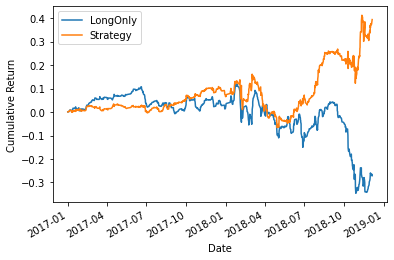

In [2]:
#old performance w/ unlimited leverage
import matplotlib.pyplot as plt

for i in test_dataset2.index:
    if (test_dataset2.at[i,'Predict']=='Up'):
        test_dataset2.at[i,'Strategy']=test_dataset2.at[i,'LongOnly']
    else:
        test_dataset2.at[i,'Strategy']=-test_dataset2.at[i,'LongOnly']

print(test_dataset2)

((1 + test_dataset2[['LongOnly','Strategy']]).cumprod() - 1).plot()
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()

                    Predict  LongOnly  Strategy        Date      Time
created_at                                                           
2016-12-31 13:17:21      Up  0.000705  0.000705  2016-12-31  13:17:21
2017-01-02 18:44:04      Up  0.000705  0.000705  2017-01-02  18:44:04
2017-01-03 17:00:11      Up  0.002636  0.002636  2017-01-03  17:00:11
2017-01-04 12:22:38      Up  0.000449  0.000449  2017-01-04  12:22:38
2017-01-04 13:27:03      Up  0.000710  0.000710  2017-01-04  13:27:03
...                     ...       ...       ...         ...       ...
2018-12-03 12:54:30      Up  0.003138  0.003138  2018-12-03  12:54:30
2018-12-03 13:18:01      Up  0.001001  0.001001  2018-12-03  13:18:01
2018-12-03 13:30:46      Up  0.001453  0.001453  2018-12-03  13:30:46
2018-12-03 15:56:06      Up  0.000760  0.000760  2018-12-03  15:56:06
2018-12-04 14:55:35    Down -0.009463  0.009463  2018-12-04  14:55:35

[1272 rows x 5 columns]
                    Predict  LongOnly  Strategy        Date      

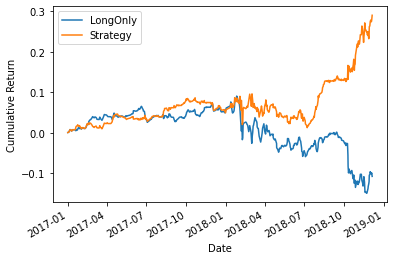

In [3]:
#simply remove all duplicates of date and keep the first, see performance

import pandas as pd

#Assign new columns to a DataFrame, breaking down date index, while old Dataframe does not change
test_dataset3=test_dataset2.assign(Date=test_dataset2.index.date, Time=test_dataset2.index.time)
print(test_dataset3)

#remove duplicates and keep the first one
test_dataset3 = test_dataset3[~test_dataset3.Date.duplicated(keep='first')]
print(test_dataset3)

((1 + test_dataset3[['LongOnly','Strategy']]).cumprod() - 1).plot()
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()

                    Predict  LongOnly  Strategy        Date      Time
created_at                                                           
2016-12-31 13:17:21      Up  0.000705  0.000705  2016-12-31  13:17:21
2017-01-02 18:44:04      Up  0.000705  0.000705  2017-01-02  18:44:04
2017-01-03 17:00:11      Up  0.002636  0.002636  2017-01-03  17:00:11
2017-01-04 12:22:38      Up  0.000449  0.000449  2017-01-04  12:22:38
2017-01-04 13:27:03      Up  0.000710  0.000710  2017-01-04  13:27:03
...                     ...       ...       ...         ...       ...
2018-12-03 12:54:30      Up  0.003138  0.003138  2018-12-03  12:54:30
2018-12-03 13:18:01      Up  0.001001  0.001001  2018-12-03  13:18:01
2018-12-03 13:30:46      Up  0.001453  0.001453  2018-12-03  13:30:46
2018-12-03 15:56:06      Up  0.000760  0.000760  2018-12-03  15:56:06
2018-12-04 14:55:35    Down -0.009463  0.009463  2018-12-04  14:55:35

[1272 rows x 5 columns]
                    Predict  LongOnly  Strategy        Date      

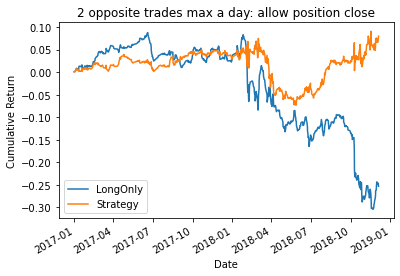

In [4]:
#variation of '1 trade max a day': allow max 1 up & 1 down per day, i.e. can long 1 time, or close long when down signal
#remove all duplicates when date AND Predict are the same!->leaving the first up and down in the dataframe
#when shorting when in a long postion, essentially same as closing the long position after opening a short position
#->does not need to change the dataset

import pandas as pd

#Assign new columns to a DataFrame, breaking down date index, while old Dataframe does not change
test_dataset4=test_dataset2.assign(Date=test_dataset2.index.date, Time=test_dataset2.index.time)
print(test_dataset4)

#remove duplicates for date and predict, and keep the first one
#751 rows>545 rows, successfully keep the same date ones with different 'Predict'
test_dataset4 = test_dataset4.drop_duplicates(['Date','Predict'],keep= 'first')

#show entire dataframe for print
#pd.set_option("display.max_rows", None, "display.max_columns", None)

        
print(test_dataset4)


((1 + test_dataset4[['LongOnly','Strategy']]).cumprod() - 1).plot()
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('2 opposite trades max a day: allow position close')
plt.show()

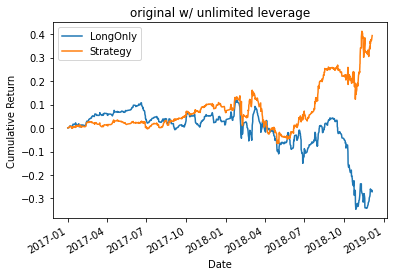

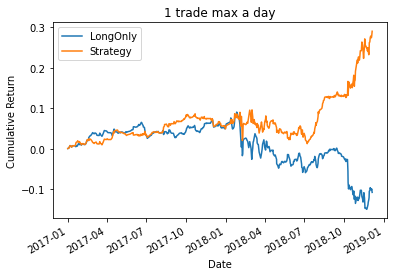

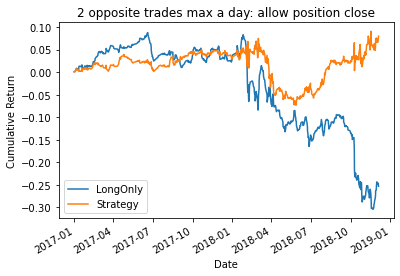

In [5]:
#show 3 cases together here
((1 + test_dataset2[['LongOnly','Strategy']]).cumprod() - 1).plot()
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('original w/ unlimited leverage')
plt.show()

((1 + test_dataset3[['LongOnly','Strategy']]).cumprod() - 1).plot()
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('1 trade max a day')
plt.show()

((1 + test_dataset4[['LongOnly','Strategy']]).cumprod() - 1).plot()
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('2 opposite trades max a day: allow position close')
plt.show()

<h1>Performance </h1>
<h3>'unlimited leverage' has the larger cumu return, and way larger drawdown, compared to '1 trade max a day' </h3>
<h3>It shows naive bayes prediction accuracy is good, but when we have so much leverage, it only increases cumu return by 0.1. It says that the following tweets are not as impactful and not as a good time for adding postions </h3>
<h3>If against large tail risk, '1 trade max a day' would perform a lot better</h3>


<h3>'2 opposite trades max a day': Very small returns compared to previous 2 strategies </h3>
<h3>Reasons:1. frequent open and close position cause missed opportunities</h3>
<h3>2. compared to '1 max trade a day' strategy, it showed that reacting to the first tweet of a day generate more cumu returns </h3>

<h3>In sum, open more postions after 1st tweet is not a good idea, which generate very moderate additional return, but might incur large tail risks</h3>